In [2]:
from epi_models import (
    DeterministicCompartmentalModel, 
    DeterministicCompartmentalModelRunner,
    DeterministicCompartmentalModelScenario,
    SingleInterventionScenario, 
    CampParams,
)

In [3]:
camp_params = CampParams.load_from_json("./epi_models/config/sample_input.json")

In [4]:
import pandas as pd

In [5]:
df = pd.read_json("./epi_models/config/sample_input.json", orient='index')

In [6]:
df.rename(columns={0: "Values"}).to_csv("sample_data_input.csv",index=False)

In [7]:
runner = DeterministicCompartmentalModelRunner(camp_params, num_iterations=1)

In [8]:
runner.do_nothing_scenario.__dict__

{'baseline_param_dict': {'transmission_reduction_factor': 1,
  'isolation_capacity': 0.0,
  'remove_symptomatic_rate': 0.0,
  'first_high_risk_category_n': 2,
  'remove_high_risk_rate': 0.0,
  'icu_capacity': 0.0003,
  'infection_matrix': array([[ 4.22809072,  0.76683669,  0.69660451,  1.69675934,  0.9419763 ,
           0.40558608,  0.26184182,  0.13495187],
         [ 1.03261083, 10.05606702,  1.01280489,  1.14206231,  1.56232239,
           0.46542807,  0.1387554 ,  0.10195448],
         [ 0.47648793,  1.33730962,  5.13565028,  2.80824944,  2.01839376,
           1.07529096,  0.15740874,  0.09723487],
         [ 1.69258432,  1.33778696,  2.53743288,  5.44312577,  2.97093189,
           1.23122415,  0.43175245,  0.19069098],
         [ 0.8846813 ,  2.10324815,  1.90233514,  3.04133909,  3.86404601,
           1.23801107,  0.30903475,  0.21044958],
         [ 0.92895678,  1.68534637,  1.71733168,  1.98331471,  2.14926742,
           2.2260002 ,  0.57990652,  0.25079698],
         [ 0.

In [9]:
runner.camp_baseline.__dict__

{'baseline_param_dict': {'transmission_reduction_factor': 0.9375,
  'isolation_capacity': 0.01,
  'remove_symptomatic_rate': 0.01,
  'first_high_risk_category_n': 1,
  'remove_high_risk_rate': 0.01,
  'icu_capacity': 0.0003,
  'infection_matrix': array([[ 4.22809072,  0.76683669,  0.69660451,  1.69675934,  0.9419763 ,
           0.40558608,  0.26184182,  0.13495187],
         [ 1.03261083, 10.05606702,  1.01280489,  1.14206231,  1.56232239,
           0.46542807,  0.1387554 ,  0.10195448],
         [ 0.47648793,  1.33730962,  5.13565028,  2.80824944,  2.01839376,
           1.07529096,  0.15740874,  0.09723487],
         [ 1.69258432,  1.33778696,  2.53743288,  5.44312577,  2.97093189,
           1.23122415,  0.43175245,  0.19069098],
         [ 0.8846813 ,  2.10324815,  1.90233514,  3.04133909,  3.86404601,
           1.23801107,  0.30903475,  0.21044958],
         [ 0.92895678,  1.68534637,  1.71733168,  1.98331471,  2.14926742,
           2.2260002 ,  0.57990652,  0.25079698],
     

In [10]:
runner.generated_params_df.shape

(1, 12)

In [11]:
assert runner.model.infection_matrix.shape == (8, 8)

In [12]:
do_nothing_baseline, camp_baseline = runner.run_baselines()

In [13]:
do_nothing_baseline.to_csv('sample_data_output.csv', index=False)

In [14]:
do_nothing_baseline.columns.tolist()

['Susceptible_0_9',
 'Exposed_0_9',
 'Infected_symptomatic_0_9',
 'Infected_asymptomatic_0_9',
 'Recovered_0_9',
 'Hospitalised_0_9',
 'Critical_0_9',
 'Deaths_0_9',
 'Offsite_0_9',
 'Quarantined_0_9',
 'No_ICU_Care_0_9',
 'Susceptible_10_19',
 'Exposed_10_19',
 'Infected_symptomatic_10_19',
 'Infected_asymptomatic_10_19',
 'Recovered_10_19',
 'Hospitalised_10_19',
 'Critical_10_19',
 'Deaths_10_19',
 'Offsite_10_19',
 'Quarantined_10_19',
 'No_ICU_Care_10_19',
 'Susceptible_20_29',
 'Exposed_20_29',
 'Infected_symptomatic_20_29',
 'Infected_asymptomatic_20_29',
 'Recovered_20_29',
 'Hospitalised_20_29',
 'Critical_20_29',
 'Deaths_20_29',
 'Offsite_20_29',
 'Quarantined_20_29',
 'No_ICU_Care_20_29',
 'Susceptible_30_39',
 'Exposed_30_39',
 'Infected_symptomatic_30_39',
 'Infected_asymptomatic_30_39',
 'Recovered_30_39',
 'Hospitalised_30_39',
 'Critical_30_39',
 'Deaths_30_39',
 'Offsite_30_39',
 'Quarantined_30_39',
 'No_ICU_Care_30_39',
 'Susceptible_40_49',
 'Exposed_40_49',
 'Infe

In [15]:
better_hygiene_intervention_result, increase_icu_intervention_result, increase_remove_high_risk_result, \
               better_isolation_intervention_result, shielding_intervention_result = runner.run_different_scenarios()

In [16]:
better_hygiene_intervention_result = runner.run_better_hygiene_scenarios()

In [17]:
better_hygiene_intervention_result.keys()

dict_keys(['5%|one_month', '5%|three_month', '5%|six_month', '10%|one_month', '10%|three_month', '10%|six_month', '15%|one_month', '15%|three_month', '15%|six_month'])

In [19]:
increase_icu_intervention_result.keys()

dict_keys(['increase_to_ideal_icu_capacity'])

In [23]:
increase_remove_high_risk_result.keys()

dict_keys(['removal_one_week', 'removal_three_week', 'removal_six_week'])

In [24]:
better_isolation_intervention_result.keys()

dict_keys(['low_bound|0.05%|fifty_day', 'low_bound|0.05%|one_hundred_day', 'low_bound|0.05%|two_hundred_day', 'low_bound|0.1%|fifty_day', 'low_bound|0.1%|one_hundred_day', 'low_bound|0.1%|two_hundred_day', 'low_bound|0.25%|fifty_day', 'low_bound|0.25%|one_hundred_day', 'low_bound|0.25%|two_hundred_day', 'upper_bound|0.05%|fifty_day', 'upper_bound|0.05%|one_hundred_day', 'upper_bound|0.05%|two_hundred_day', 'upper_bound|0.1%|fifty_day', 'upper_bound|0.1%|one_hundred_day', 'upper_bound|0.1%|two_hundred_day', 'upper_bound|0.25%|fifty_day', 'upper_bound|0.25%|one_hundred_day', 'upper_bound|0.25%|two_hundred_day'])

In [28]:
shielding_intervention_result.keys()

AttributeError: 'NoneType' object has no attribute 'keys'

In [20]:
do_nothing_baseline = do_nothing_baseline * camp_params.total_population

In [21]:
camp_baseline = camp_baseline * camp_params.total_population

In [22]:
sim_groups = do_nothing_baseline.groupby('R0')

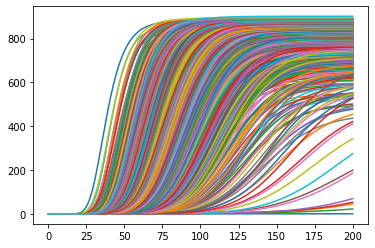

In [23]:
for index,group in sim_groups:
    group['Deaths'].plot()

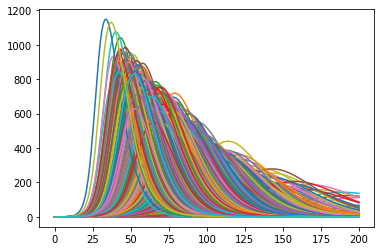

In [25]:
for index,group in sim_groups:
    group['Hospitalised'].plot()

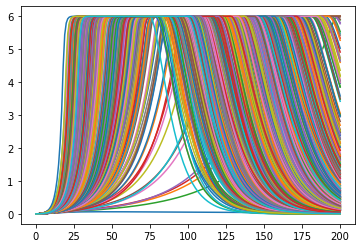

In [12]:
for index,group in sim_groups:
    group['Critical'].plot()

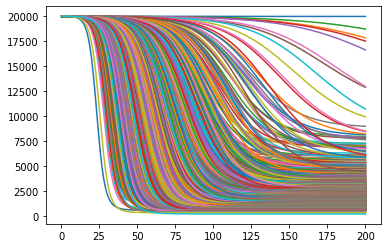

In [13]:
for index,group in sim_groups:
    group['Susceptible'].plot()

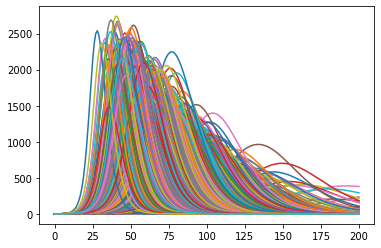

In [14]:
for index,group in sim_groups:
    group['Infected (symptomatic)'].plot()

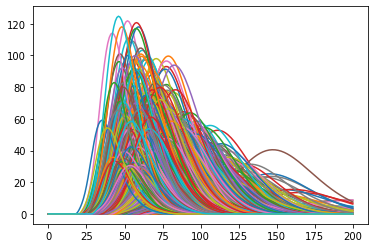

In [15]:
for index,group in sim_groups:
    group['No ICU Care'].plot()

In [17]:
sim_groups_camp = camp_baseline.groupby('R0')

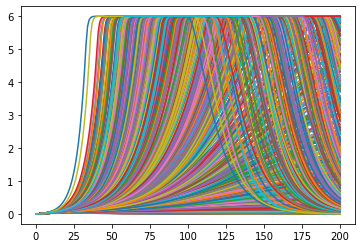

In [18]:
for index,group in sim_groups_camp:
    group['Critical'].plot()

In [23]:
camp_baseline.columns

Index(['Susceptible: 0-9', 'Exposed: 0-9', 'Infected (symptomatic): 0-9',
       'Asymptomatically Infected: 0-9', 'Recovered: 0-9', 'Hospitalised: 0-9',
       'Critical: 0-9', 'Deaths: 0-9', 'Offsite: 0-9', 'Quarantined: 0-9',
       ...
       'Exposed', 'Infected (symptomatic)', 'Asymptomatically Infected',
       'Recovered', 'Hospitalised', 'Critical', 'Deaths', 'Offsite',
       'Quarantined', 'No ICU Care'],
      dtype='object', length=106)

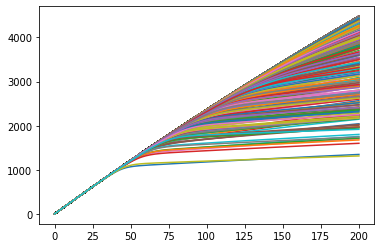

In [24]:
for index,group in sim_groups_camp:
    group['Offsite'].plot()

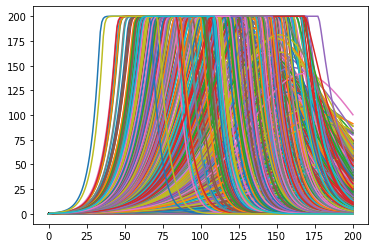

In [25]:
for index,group in sim_groups_camp:
    group['Quarantined'].plot()

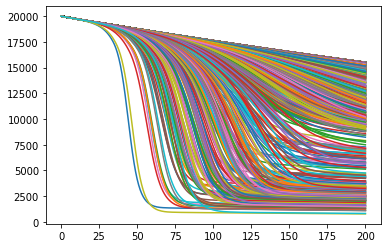

In [19]:
for index,group in sim_groups_camp:
    group['Susceptible'].plot()

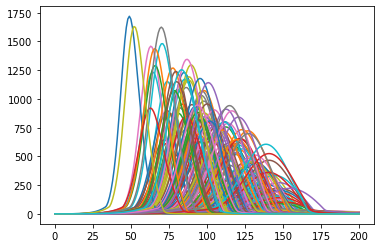

In [20]:
for index,group in sim_groups_camp:
    group['Infected (symptomatic)'].plot()

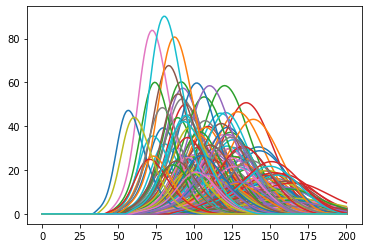

In [21]:
for index,group in sim_groups_camp:
    group['No ICU Care'].plot()

In [ ]:
#TODO: now need to test if all the interventions are working well

### Import the compartmental model and tinker with a few options
1. Single interventions
* better hygiene
* remove symptomatic (test out if the capacity implementation is working)
* increase ICU
* remove high risk
* shielding

In [26]:
# test with less iterations for sure 1000 is a nightmare to plot 

In [4]:
camp_params.total_population

20000

In [5]:
model = DeterministicCompartmentalModel(camp_params)

In [6]:
better_hygiene_6_month = SingleInterventionScenario(camp_params.total_population, [0], [180], model.infection_matrix, transmission_reduction_factor_inter=0.7)

In [7]:
%%time
better_hygiene_6_month_results = model.run_single_simulation(better_hygiene_6_month, num_iterations=100)

CPU times: user 9.91 s, sys: 111 ms, total: 10 s
Wall time: 10 s


In [8]:
better_hygiene_6_month_results = camp_params.total_population * better_hygiene_6_month_results

In [9]:
better_hygiene_6_month_groups = better_hygiene_6_month_results.groupby('R0')

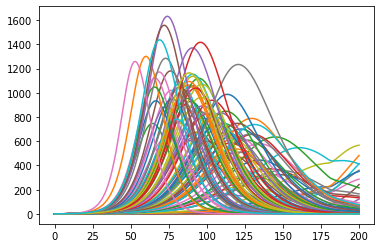

In [10]:
for index,group in better_hygiene_6_month_groups:
    group['Infected (symptomatic)'].plot()

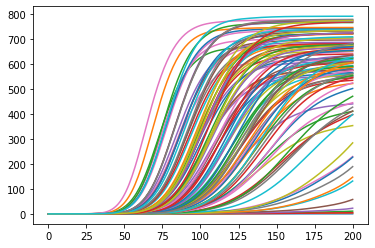

In [11]:
for index,group in better_hygiene_6_month_groups:
    group['Deaths'].plot()

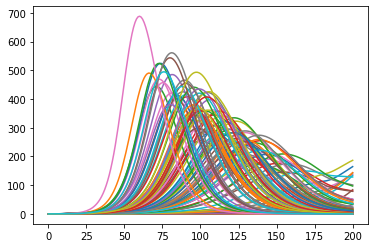

In [26]:
for index,group in better_hygiene_6_month_groups:
    group['Hospitalised'].plot()

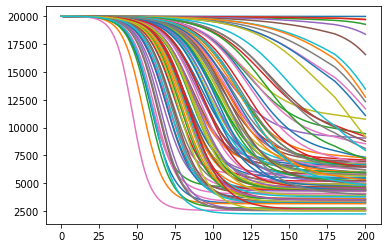

In [13]:
for index,group in better_hygiene_6_month_groups:
    group['Susceptible'].plot()

In [12]:
# test isolation
iso_6_month = SingleInterventionScenario(camp_params.total_population, [0], [180], model.infection_matrix, isolation_capacity_inter=10000, remove_symptomatic_rate_inter=10)

In [13]:
%%time
iso_6_month_results = model.run_single_simulation(iso_6_month, num_iterations=100)

CPU times: user 15.5 s, sys: 125 ms, total: 15.6 s
Wall time: 15.8 s


In [14]:
iso_6_month_results = camp_params.total_population * iso_6_month_results
iso_6_month_results_groups = iso_6_month_results.groupby('R0')

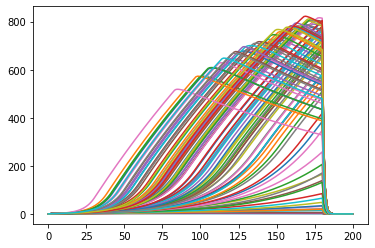

In [15]:
for index,group in iso_6_month_results_groups:
    group['Quarantined'].plot()

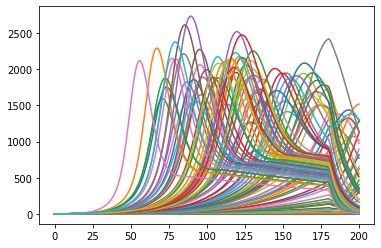

In [16]:
for index,group in iso_6_month_results_groups:
    (group['Infected (symptomatic)']+group['Quarantined']).plot()

In [17]:
# the Infected dynamics is tinted while they are in quarantine - needs a better solution to deal with this (maybe extra compartments is the answer like the Tucker model)